In [26]:
import torch
import os
import matplotlib.pyplot as plt
import math

In [27]:
batch_size = 32

In [28]:
prefix_dir = './cifar100_50_{0}'.format(batch_size)

In [29]:
train_log_loss = {}
test_log_loss = {}
train_acc = {}
test_acc = {}

for d in sorted(os.listdir(prefix_dir)):
    file_path = os.path.join(prefix_dir, d, 'stats.pth')
    stat = torch.load(file_path)
    train_log_loss[d] = [math.log(row[0]) for row in stat['train']]
    train_acc[d] = [row[1] for row in stat['train']]
    test_log_loss[d] = [math.log(row[0]) for row in stat['test']]
    test_acc[d] = [row[1] for row in stat['test']]

In [30]:
models = set([key.split('_')[0] for key in train_log_loss.keys()])

In [31]:
models = models - set(['norm2', 'zerocenter2'])

In [32]:
from collections import OrderedDict

def get_mean(dicts):
    new_dict = OrderedDict()

    for m in models:
        t = torch.tensor([dicts[key] for key in dicts if m == key.split('_')[0]])
        t = t.mean(0)
        new_dict[m] = t
    
    return new_dict

In [33]:
train_log_loss = get_mean(train_log_loss)
test_log_loss = get_mean(test_log_loss)
train_acc = get_mean(train_acc)
test_acc = get_mean(test_acc)

In [34]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

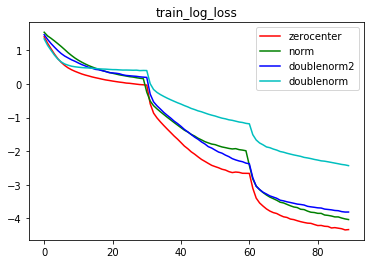

In [35]:
for c, m in zip(colors, train_log_loss):
    plt.plot(train_log_loss[m], color=c, label=m)
plt.title('train_log_loss')
plt.legend()

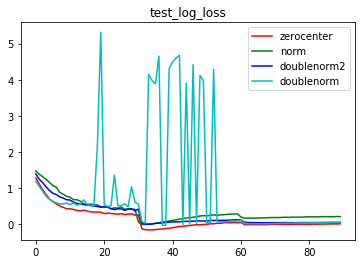

In [36]:
for c, m in zip(colors, test_log_loss):
    plt.plot(test_log_loss[m], color=c, label=m)
plt.title('test_log_loss')
plt.legend()

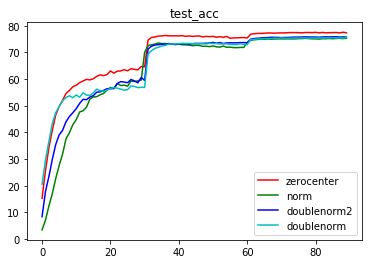

In [37]:
for c, m in zip(colors, test_acc):
    plt.plot(test_acc[m], color=c, label=m)
plt.title('test_acc')
plt.legend()

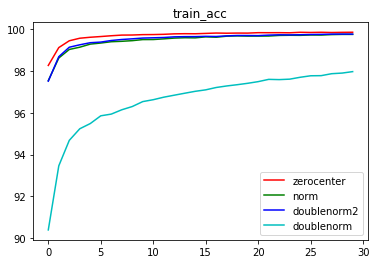

In [38]:
for c, m in zip(colors, train_acc):
    plt.plot(train_acc[m][60:], color=c, label=m)
plt.title('train_acc')
plt.legend()

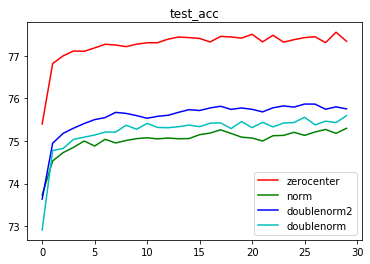

In [39]:
for c, m in zip(colors, test_acc):
    plt.plot(test_acc[m][60:], color=c, label=m)
plt.title('test_acc')
plt.legend()

In [ ]:
torch